In [2]:
# magic command
%matplotlib inline

In [3]:
# imports 
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# files used
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [5]:
# reading csv files and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [6]:
# checking for missing values in city_data_df
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [79]:
# checking data types
city_data_df.dtypes
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [8]:
# checking unique data
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# counting # of Urban cities
sum(city_data_df["type"]=="Urban")
#sum(city_data_df["type"]=="Rural")

66

In [10]:
# checking for missing values in ride_data_df
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# checking data types for ride
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# mergin two DFs
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# show merged df
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# DF for urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# DF for suburban cities
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [15]:
# DF fro Rural cities
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
# num. of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# num. of rides for Suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# num. of rides for Rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [17]:
# avg. fare for Urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# avg. fare for Suburban cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
# avg. fare for Rural cities
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [18]:
# avg. # of drivers urban
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# avg. # of drivers suburban
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# avg. # of drivers rural
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


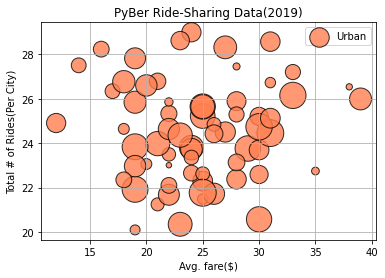

In [19]:
# urban cities Bubble chart
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c="coral", edgecolor="k", alpha=0.8,
            label="Urban",
            linewidths=1
           )
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Avg. fare($)")
plt.ylabel("Total # of Rides(Per City)")
plt.grid(True)
plt.legend()

plt.show()

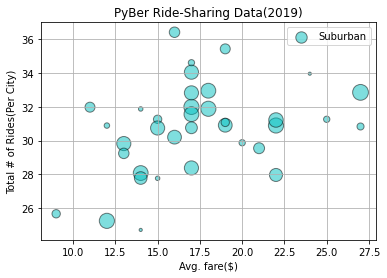

In [20]:
# suburban cities Bubble chart
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="c", edgecolor="k", alpha=0.5,
            label="Suburban",
            linewidths=1
           )
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Avg. fare($)")
plt.ylabel("Total # of Rides(Per City)")
plt.grid(True)
plt.legend()

plt.show()

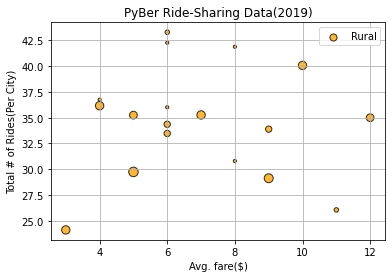

In [21]:
# rural cities Bubble chart
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            c="orange", edgecolor="k", alpha=0.8,
            label="Rural",
            linewidths=1
           )
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Avg. fare($)")
plt.ylabel("Total # of Rides(Per City)")
plt.grid(True)
plt.legend()

plt.show()

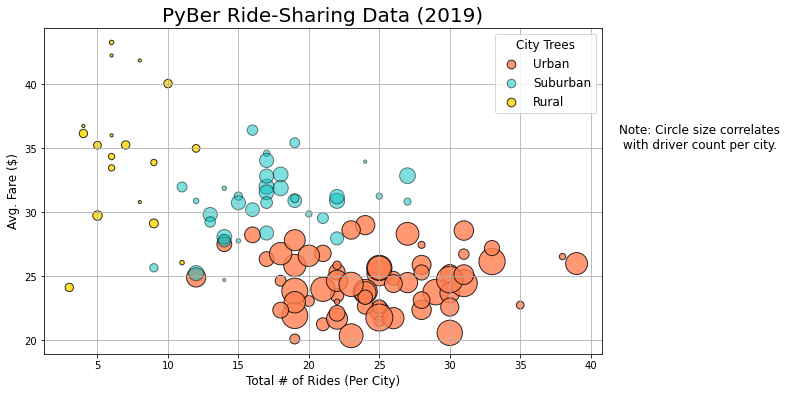

In [22]:
# Adding 3 charts into one 
plt.subplots(figsize=(10, 6)) # image size
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count,
            c="coral", edgecolor="k", alpha=0.8,
            label="Urban",
            linewidths=1
           )
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count,
            c="c", edgecolor="k", alpha=0.5,
            label="Suburban",
            linewidths=1
           )
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count,
            c="gold", edgecolor="k", alpha=0.8,
            label="Rural",
            linewidths=1
           )

# adding Graph Properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total # of Rides (Per City)", fontsize=12)
plt.ylabel("Avg. Fare ($)", fontsize=12)
plt.grid(True)

# customize legend
lgnd = plt.legend(fontsize="12", mode="Expanded", 
                  scatterpoints=1, 
                  loc="best", 
                  title="City Trees"
                 )
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# text about circle size
plt.text(42, 35, "Note: Circle size correlates\n with driver count per city.", fontsize="12")

# save figure
plt.savefig("analysis/Fig1.png", bbox_inches="tight", dpi=150)

plt.show()



In [23]:
# summary stats cities df by type (.describe())
urban_cities_df.describe()
suburban_cities_df.describe()
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [24]:
# summary of ride count by type (.describe())
urban_ride_count.describe()
suburban_ride_count.describe()
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [25]:
# calculate mean ride count by city type (Pandas Method)
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [26]:
# calculate median ride count by city type (Pandas Method)
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)


(24.0, 17.0, 6.0)

In [27]:
# calculate mode  (Pandas Method)
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode() 

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [28]:
# more imports
import numpy as np
import scipy.stats as sts

In [29]:
# calculate using NumPy and SciPy 
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
print("")

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
print("")

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")
print("")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).



In [32]:
# gets the fares for Urban
urban_fares = urban_cities_df["fare"]

# mean, midean and mode for urban
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
      
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")



The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [34]:
# gets fares for Suburban
suburban_fares = suburban_cities_df["fare"]

# mean, midean and mode for Suburban
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
      
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [35]:
# gets fares for rural
rural_fares = rural_cities_df["fare"]

# mean, midean and mode for Suburban
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
      
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [45]:
# gets driver count from urban drivers
urban_drivers = urban_cities_df["driver_count"]

# mean, midean and mode for urban drivers
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban cities is {median_urban_drivers:.0f}.")
      
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban cities is {mode_urban_drivers}.")


The mean driver count for urban cities is 37.
The median driver count for urban cities is 37.
The mode driver count for urban cities is ModeResult(mode=array([39]), count=array([86])).


In [44]:
# gets driver count from suburban drivers
suburban_drivers = suburban_cities_df["driver_count"]

# mean, midean and mode for suburban drivers
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban cities is {median_suburban_drivers:.0f}.")
      
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban cities is {mode_suburban_drivers}.")


The mean driver count for suburban cities is 14.
The median driver count for suburban cities is 16.
The mode driver count for suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [46]:
# gets driver count from rural drivers
rural_drivers = rural_cities_df["driver_count"]

# mean, midean and mode for rural drivers
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural cities is {median_rural_drivers:.0f}.")
      
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural cities is {mode_rural_drivers}.")


The mean driver count for rural cities is 4.
The median driver count for rural cities is 4.
The mode driver count for rural cities is ModeResult(mode=array([1]), count=array([32])).


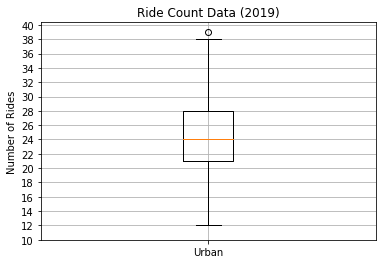

In [47]:
# Box and whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# adding details
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()
plt.show()

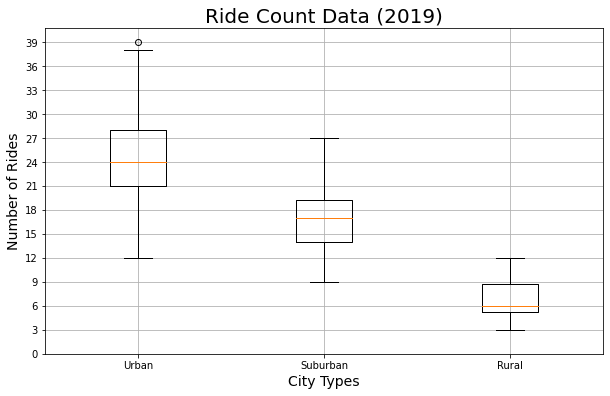

In [53]:
# Box and whisker plot for the urban, suburban & rural cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))

# adding details
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,41, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()

In [54]:
# gets the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


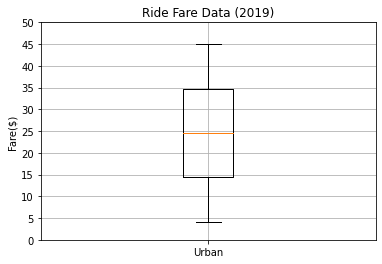

Summary Stats


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [57]:
# b&W for Urban fare data
x_label = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels=x_label)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare($)")
ax.set_yticks(np.arange(0,51, step=5.0))
ax.grid()
plt.show()
print("Summary Stats")
urban_fares.describe()

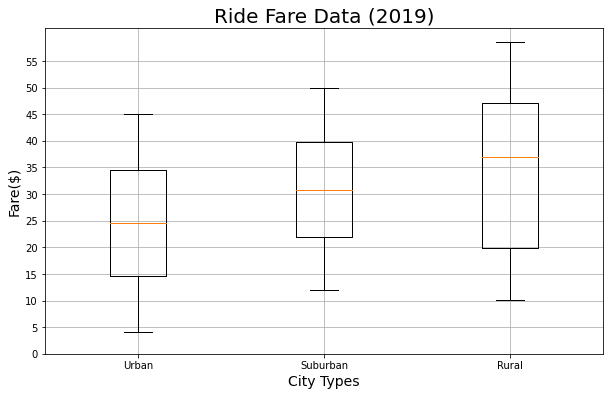

In [59]:
# b&W for Urban, Suburban & Rural fare data
x_label = ["Urban","Suburban","Rural"]
fare_data = [urban_fares,suburban_fares,rural_fares]
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(fare_data, labels=x_label)

ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare($)", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,56, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")
plt.show()

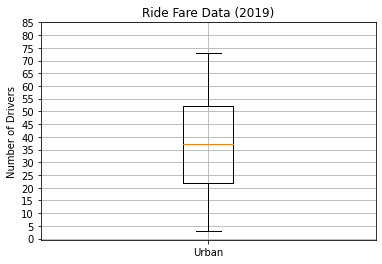

Summary Stats


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [61]:
# b&W for Urban fare data
x_label = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_drivers, labels=x_label)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,86, step=5.0))
ax.grid()
plt.show()
print("Summary Stats")
urban_drivers.describe()

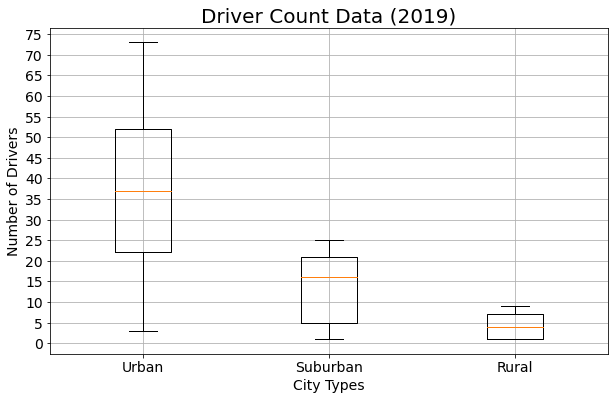

In [71]:
# b&W for Urban, Suburban & Rural drivers data
x_label = ["Urban","Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(driver_data, labels=x_label)

ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,76, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")
plt.show()


In [63]:
# gets the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [64]:
# sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [66]:
# calculates the % of fare for each city type
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [ ]:
# Alt
#type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
#type_percents

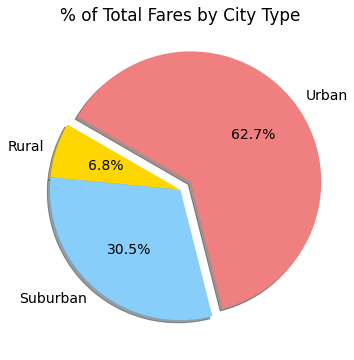

In [72]:
# imports
import matplotlib as mpl

# pie size 
plt.subplots(figsize=(10,6))
# pie chart by % of fares by city type
plt.pie(type_percents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150
       )
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"]=14

plt.savefig("analysis/Fig5.png")
plt.show()

In [73]:
# Rdie Percentages
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

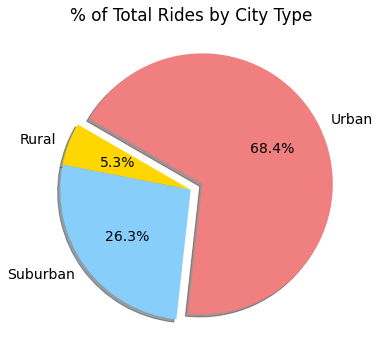

In [76]:
# Pie for Ride %
# pie size 
plt.subplots(figsize=(10,6))
# pie chart by % of fares by city type
plt.pie(ride_percents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150
       )
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"]=14

plt.savefig("analysis/Fig6.png")
plt.show()

In [80]:
# Driver Percentages
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

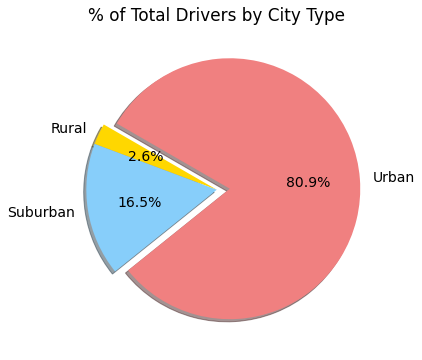

In [82]:
# Pie for Driver %
# pie size 
plt.subplots(figsize=(10,6))
# pie chart by % of fares by city type
plt.pie(driver_percents, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct="%1.1f%%",
        shadow=True, startangle=150
       )
plt.title("% of Total Drivers by City Type")
mpl.rcParams["font.size"]=14

plt.savefig("analysis/Fig7.png")
plt.show()